In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
no_noise = pd.read_csv("results_ptbxl_no_noise.csv")

In [59]:
no_noise = no_noise.set_index("Method").sort_index()

In [60]:
noise_01 = pd.read_csv("results_ptbxl_noise01.csv")

In [61]:
noise_01 = noise_01.set_index("Method").sort_index()

In [62]:
noise_05 = pd.read_csv("results_ptbxl_noise05.csv")

In [63]:
noise_05 = noise_05.set_index("Method").sort_index()

In [64]:
noise_1 = pd.read_csv("results_ptbxl_noise1.csv")

In [65]:
noise_1 = noise_1.set_index("Method").sort_index()

In [66]:
noise_1.columns[1:]

Index(['exp0_AUC', 'exp1_AUC', 'exp1.1_AUC', 'exp1.1.1_AUC', 'exp2_AUC',
       'exp3_AUC'],
      dtype='object')

In [67]:
len(noise_1)

9

In [79]:

num_1 = float(no_noise["exp0_AUC"][0].split("(")[0])

In [80]:
num_2 = float(noise_1["exp0_AUC"][0].split("(")[0])

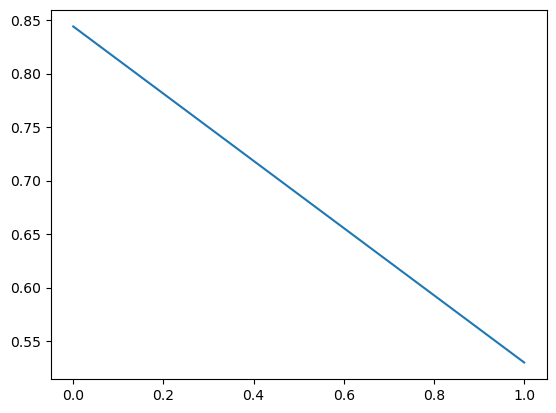

In [81]:
plt.plot([num_1,num_2])

In [56]:
noise_1

,Unnamed: 0,exp0_AUC,exp1_AUC,exp1.1_AUC,exp1.1.1_AUC,exp2_AUC,exp3_AUC
Method,,,,,,,
Wavelet+NN,4,0.530(18),0.520(22),0.525(31),0.536(12),0.520(32),0.540(59)
ensemble,7,0.844(09),0.868(14),0.896(13),0.872(07),0.825(15),0.841(31)
fastai_fcn_wang,1,0.782(14),0.790(17),0.830(16),0.839(08),0.741(20),0.716(44)
fastai_inception1d,2,0.783(11),0.833(16),0.855(17),0.828(08),0.784(16),0.686(38)
fastai_lstm,3,0.807(14),0.846(15),0.869(17),0.877(08),0.779(19),0.789(42)
fastai_lstm_bidir,0,0.842(11),0.845(20),0.857(21),0.854(08),0.810(14),0.843(24)
fastai_resnet1d_wang,8,0.772(14),0.832(15),0.856(18),0.842(08),0.743(15),0.788(24)
fastai_xresnet1d101,6,0.821(11),0.839(13),0.862(11),0.844(08),0.758(16),0.702(38)
naive,5,0.500(00),0.500(00),0.500(00),0.500(00),0.500(00),0.500(00)


In [82]:
noise_1.index

Index(['Wavelet+NN', 'ensemble', 'fastai_fcn_wang', 'fastai_inception1d',
       'fastai_lstm', 'fastai_lstm_bidir', 'fastai_resnet1d_wang',
       'fastai_xresnet1d101', 'naive'],
      dtype='object', name='Method')

In [93]:
bechmark_name = ["All", "Diagnostic", "Subdiagnostic", "Superdiagnostic", "Form", "Rhythm"]

In [109]:
plt.rcParams.update({'font.size': 12})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


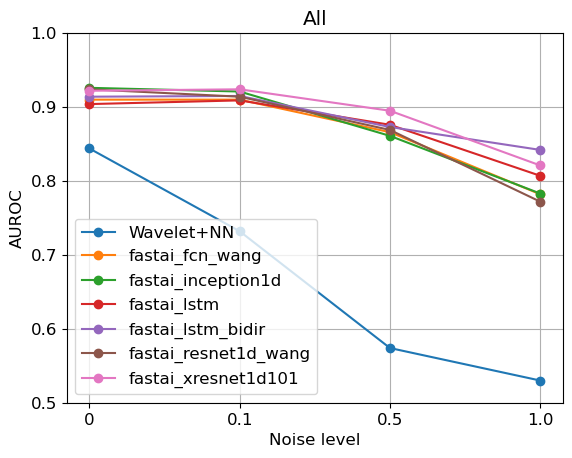

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


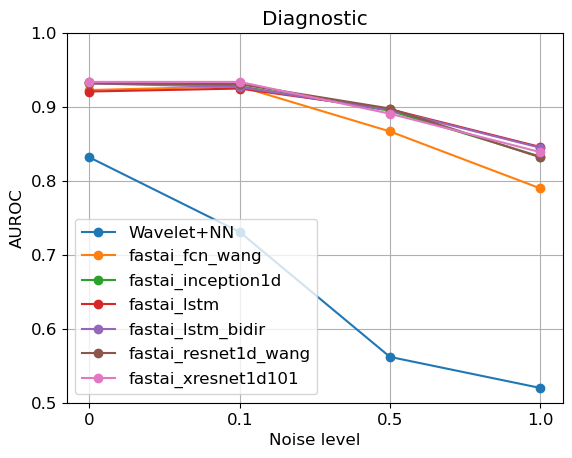

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


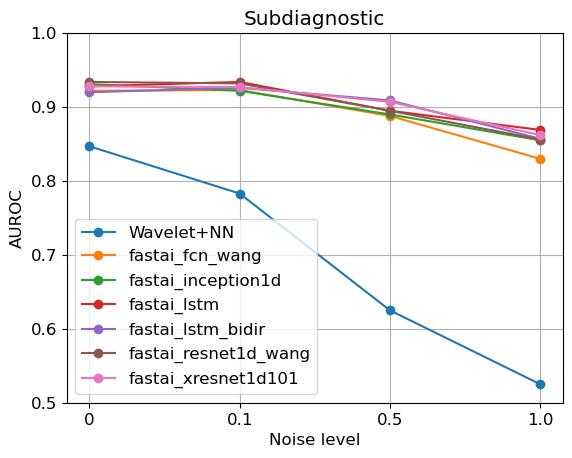

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


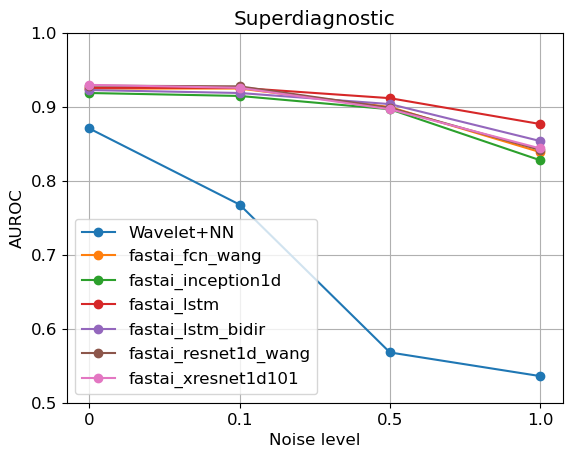

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


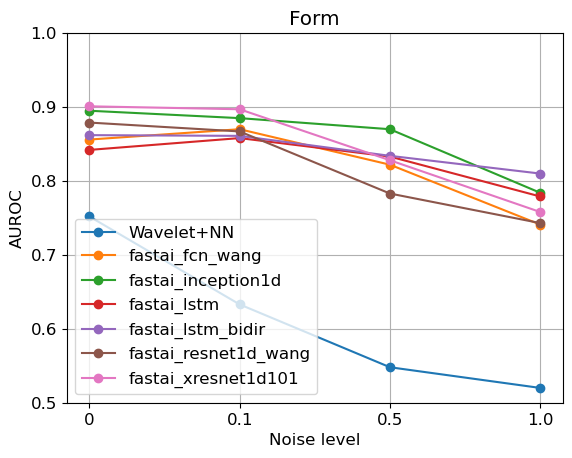

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


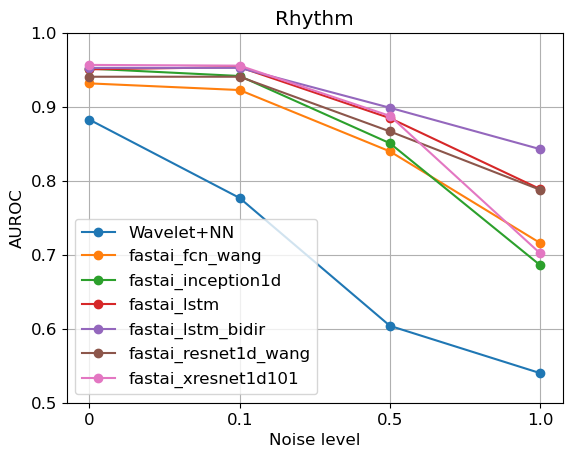

In [111]:
cnt = 0
for col in ['exp0_AUC', 'exp1_AUC', 'exp1.1_AUC', 'exp1.1.1_AUC', 'exp2_AUC','exp3_AUC']:
    for model_num in range(len(noise_1)):
        if noise_1.index[model_num] == "naive" or noise_1.index[model_num] == "ensemble":
            continue
        else:
            num_1 = float(no_noise[col][model_num].split("(")[0])
            num_2 = float(noise_01[col][model_num].split("(")[0])
            num_3 = float(noise_05[col][model_num].split("(")[0])
            num_4 = float(noise_1[col][model_num].split("(")[0])
            plt.plot([num_1,num_2,num_3,num_4], "-o", label=noise_1.index[model_num])
    plt.grid()
    plt.ylabel("AUROC")
    plt.xlabel("Noise level")
    plt.title(bechmark_name[cnt])
    plt.xticks([0,1,2,3],["0","0.1","0.5","1.0"])
    plt.ylim(0.5,1.0)
    plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
    plt.legend()
    plt.savefig("noise_" + bechmark_name[cnt] + ".eps", bbox_inches="tight",dpi=300)
    plt.show()
    cnt += 1